# Resolution of the median filter with a noised spike.

## DW  2015.18.11

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt, triang
import sys
# Add a new path with needed .py files.
sys.path.insert(0, 'C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\MedianFilter\Python') 

import functions
import gitInformation

In [3]:
%matplotlib inline

In [4]:
gitInformation.printInformation()

Information about this notebook
Date: 2015-11-20
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\.git
Current git SHA: 452a9271f71db477968625b3dfeb7df0141d04b1
Remotes: fork, origin, 
Current branch: master
fork remote URL: http://github.com/dowa4213/kt-2015-DSPHandsOn.git
origin remote URL: https://github.com/ktakagaki/kt-2015-DSPHandsOn.git


### 1. Create all needed arrays and data.

In [8]:
tri = triang(11)
x = np.zeros(67)
data = np.append(tri,x)
data = np.append(x,data)
# Different noises with different standard deviations (spread or "width")
# will be saved in, so we can generate different signal to noise ratios
diff_noise = np.zeros((140,len(data)))
# Noised sine waves. 
noised_data = np.zeros((140,len(data)))
# Median filtered wave.
medfilter = np.zeros((140,len(data)))
# Filtered sine waves (noised_sines - medfilter)
filtered_data = np.zeros((140,len(data)))
# Behavior of the median filter. Save the max values of the filtered waves in it.
behav = np.zeros(140)
# Different window lengths we use for the median filter.
wl = [3, 5, 7, 11, 15, 19, 23, 25,51]
# Different standard deviation for the noise 
stdsn = [0.33333333, 0.25, 0.2, 0.1666667, 0.142857, 0.125, 0.11111111, 0.1]

### Figure 1. Basic Plots.

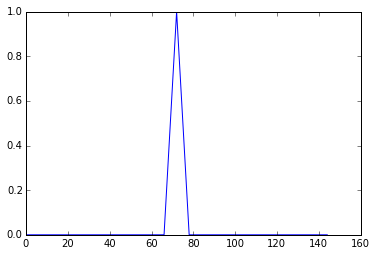

In [5]:
# Data without noise.
plt.plot(data)

In [6]:
# Generating noise with a standard deviation of 0.2.
noise = np.random.normal(0,0.2,len(data))
# Adding noise to the signal 
signal = noise + data
# Filter the noised signal with a median filter with window 
# length 5.
filtered = medfilt(signal, 5)
# We subtract the filtered wave from the noised one to see the result.
resolution =  signal - filtered

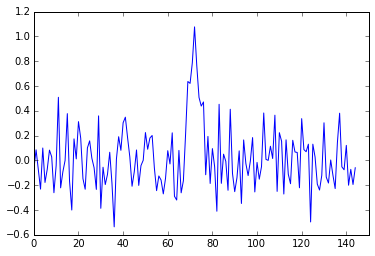

In [7]:
plt.figure()
plt.axis([0,150, -0.6, 1.2])
plt.plot(signal)
plt.savefig('Noised Spike.png', dpi = 300)

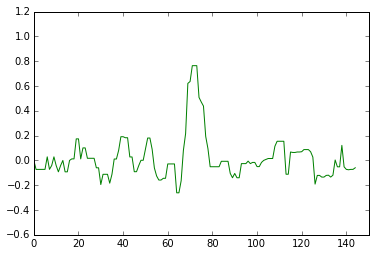

In [8]:
plt.figure()
plt.axis([0,150, -0.6, 1.2])
plt.plot(filtered, color = 'g')
plt.savefig('Filtered noised spike.png', dpi = 300)

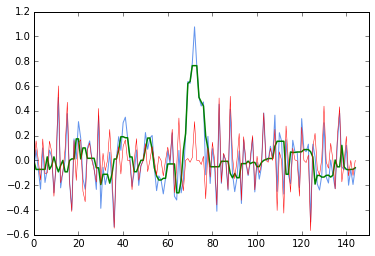

In [9]:
plt.figure()
plt.axis([0,150, -0.6, 1.2])
plt.plot(signal, color = 'cornflowerblue')
plt.plot(filtered, color = 'g', lw = 1.5)
plt.plot((resolution), color = 'r', lw = 0.5)
plt.savefig('Resolution noised spike.png', dpi = 300)

In [6]:
viridis_data = np.loadtxt('viridis_data.txt')
plasma_data = np.loadtxt('plasma_data.txt')

### Figure 2. Behavior of the median filter with given window length and different noise

In [11]:
# Generating an array where the result will be saved in.
values = np.zeros((len(stdsn), len(wl)))
# We need 2 count variables because the for loops aren't linear numbers,
# we use them to iterate trough the values array.
count = -1
count1 = -1
for w in wl:
    count = count + 1
    for s in stdsn:
        count1 = count1 + 1
        for i in range(len(diff_noise)):
            # Generating 140 different noises with with same standard deviation s.
            diff_noise[i,:] = np.random.normal(0, s, len(data))
            # Add the noises to data. 
            noised_data[i,:] = data + diff_noise[i,:]
            # Filter the data with same window length w.
            medfilter[i,:] = medfilt(noised_data[i,:], w)
            # Calculate the resolution of the filter.
            filtered_data[i,:] = noised_data[i,:] - medfilter[i,:]
            # Calculate the RMS of each resolution and save it in the behav array.
            behav[i] = np.sqrt(np.mean(np.square(filtered_data[i,:])))
        # Now calculate the mean of the behav array.
        # This is the mean behavior of the median with window length w and
        # noise with standart deviation s.
        mean = np.mean(behav)
        # Now save the mean in values array. 
        values[count1:count1+1:,count] = mean
    # Set count back to -1, so in the next loop the counter will start with 0 again.
    # Otherwise it would be out of range.
    count1 = -1
np.savetxt("valuesspike.txt",values)

In [12]:
values = np.loadtxt("valuesspike.txt")

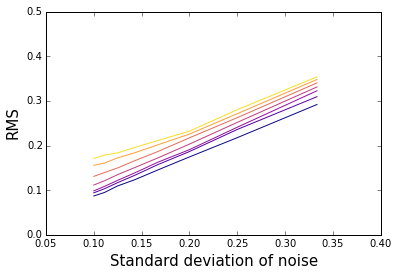

In [13]:
fig = plt.figure()
for p in range (7):
    plt.axis([0.05, 0.4, 0, .5])
    plt.xlabel('Standard deviation of noise', fontsize = 15)
    plt.ylabel('RMS', fontsize = 15)
    plt.plot(stdsn,values[:,p], color=plasma_data[(p*40),:])
plt.savefig('Behavior given wl different noise spike.png', dpi = 300)

###Figure 2.1 Alternative

In [14]:
# Subtract the filtered data from the normal, not from the noised.
values = np.zeros((len(stdsn), len(wl)))
count = -1
count1 = -1
for w in wl:
    count = count + 1
    for s in stdsn:
        count1 = count1 + 1
        for i in range(len(diff_noise)):
            diff_noise[i,:] = np.random.normal(0, s, len(data))
            noised_data[i,:] = data + diff_noise[i,:]
            medfilter[i,:] = medfilt(noised_data[i,:], w)
            filtered_data[i,:] = data - medfilter[i,:]
            behav[i] = np.sqrt(np.mean(np.square(filtered_data[i,:])))
        mean = np.mean(behav)
        values[count1:count1+1:,count] = mean
    count1 = -1
np.savetxt("valuesspikeA.txt",values)

In [15]:
values = np.loadtxt("valuesspikeA.txt")

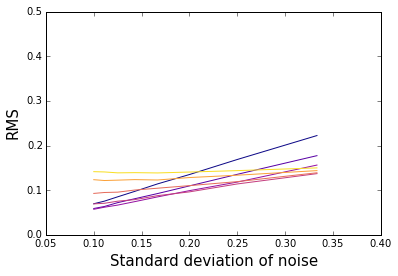

In [16]:
fig = plt.figure()
for p in range (7):
    plt.axis([0.05, 0.4, 0, .5])
    plt.xlabel('Standard deviation of noise', fontsize = 15)
    plt.ylabel('RMS', fontsize = 15)
    plt.plot(stdsn,values[:,p], color=plasma_data[(p*40),:])
plt.savefig('Behavior given wl different noise spikeA.png', dpi = 300)

###Figure 3. Behavior of the median filter with different window length and given noise

In [17]:
values = np.zeros((len(wl), len(stdsn)))
count = -1
count2 = -1
for s in stdsn:
    count = count + 1
    for w in wl:
        count2 = count2 + 1
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, s, len(data))
            noised_data[i, :] = data + diff_noise[i, :]
            medfilter[i, :] = medfilt(noised_data[i, :], w)
            filtered_data[i, :] = noised_data[i, :] - medfilter[i, :]
            behav[i] = np.sqrt(np.mean(np.square(filtered_data[i, :])))
        mean = np.mean(behav)   
        values[count2:count2+1:,-count] = mean
    count2 = -1
np.savetxt("valuesspikes2.txt", values)

In [18]:
values = np.loadtxt("valuesspikes2.txt")

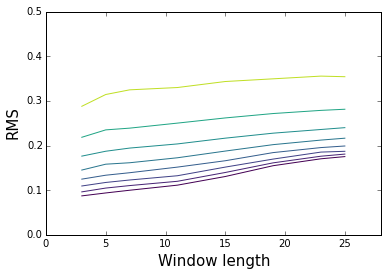

In [19]:
plt.figure()
for i in range (8):
    plt.axis([0, max(wl) + 3, 0, .5])
    plt.xlabel('Window length', fontsize = 15)
    plt.ylabel('RMS', fontsize = 15)
    plt.plot(wl,values[:,i], color=viridis_data[((i)*25)-25,:])
    plt.plot(np.std(data))
plt.savefig('Behavior given noise different wl spike.png', dpi = 300)

## Figure 3.1 Alternative

In [9]:
values = np.zeros((len(wl), len(stdsn)))
count = -1
count2 = -1
for s in stdsn:
    count = count + 1
    for w in wl:
        count2 = count2 + 1
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, s, len(data))
            noised_data[i, :] = data + diff_noise[i, :]
            medfilter[i, :] = medfilt(noised_data[i, :], w)
            filtered_data[i, :] = data - medfilter[i, :]
            behav[i] = np.sqrt(np.mean(np.square(filtered_data[i, :])))
        mean = np.mean(behav)   
        values[count2:count2+1:,-count] = mean
    count2 = -1
np.savetxt("valuesspikes2A.txt", values)

In [10]:
values = np.loadtxt("valuesspikes2A.txt")

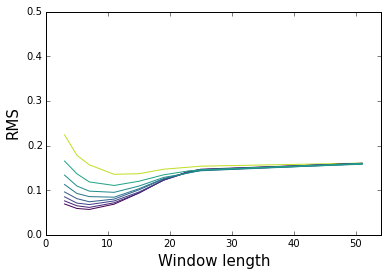

In [11]:
plt.figure()
for i in range (8):
    plt.axis([0, max(wl) + 3, 0, .5])
    plt.xlabel('Window length', fontsize = 15)
    plt.ylabel('RMS', fontsize = 15)
    plt.plot(wl,values[:,i], color=viridis_data[((i)*25)-25,:])
    plt.plot(np.std(data))
plt.savefig('Behavior given noise different wl spikeA.png', dpi = 300)

### Figure 4. plots with different window length and different noise.

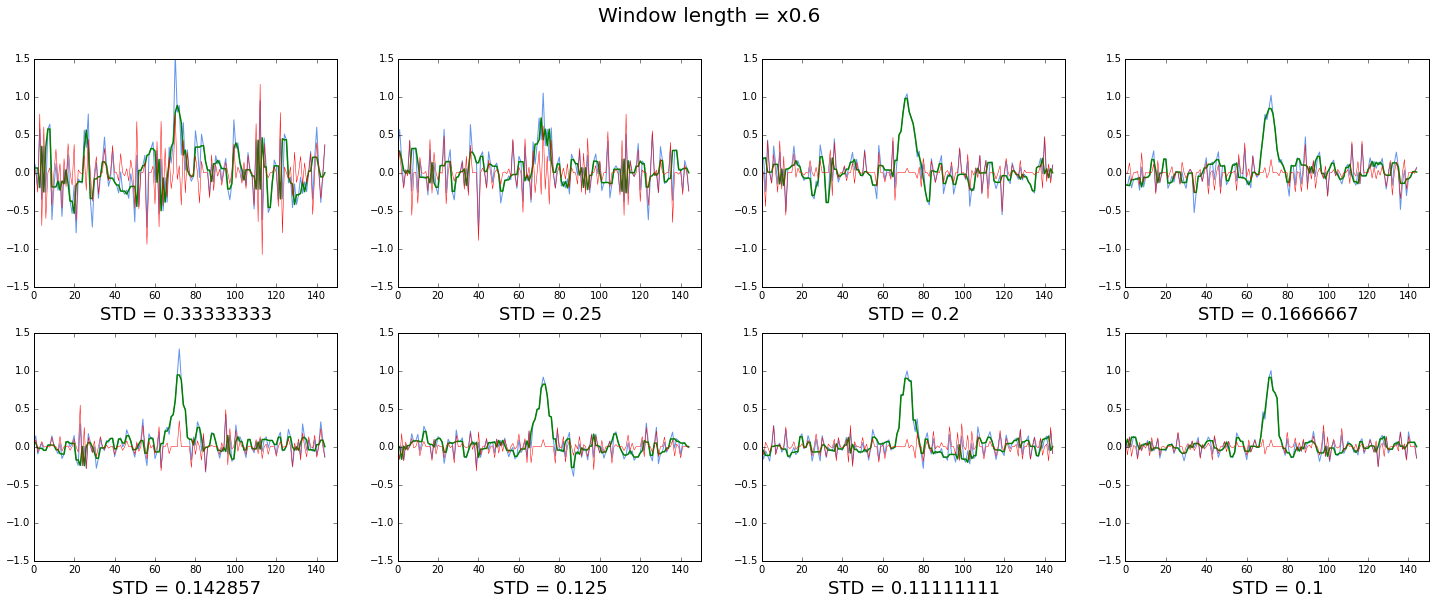

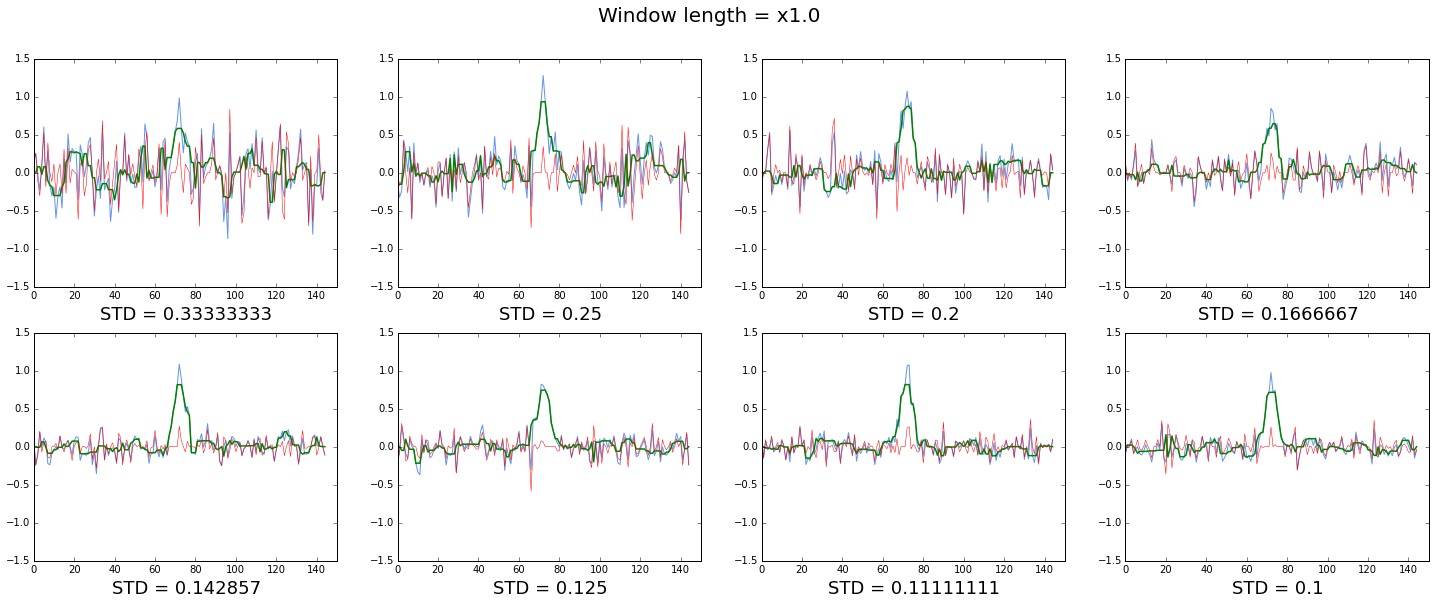

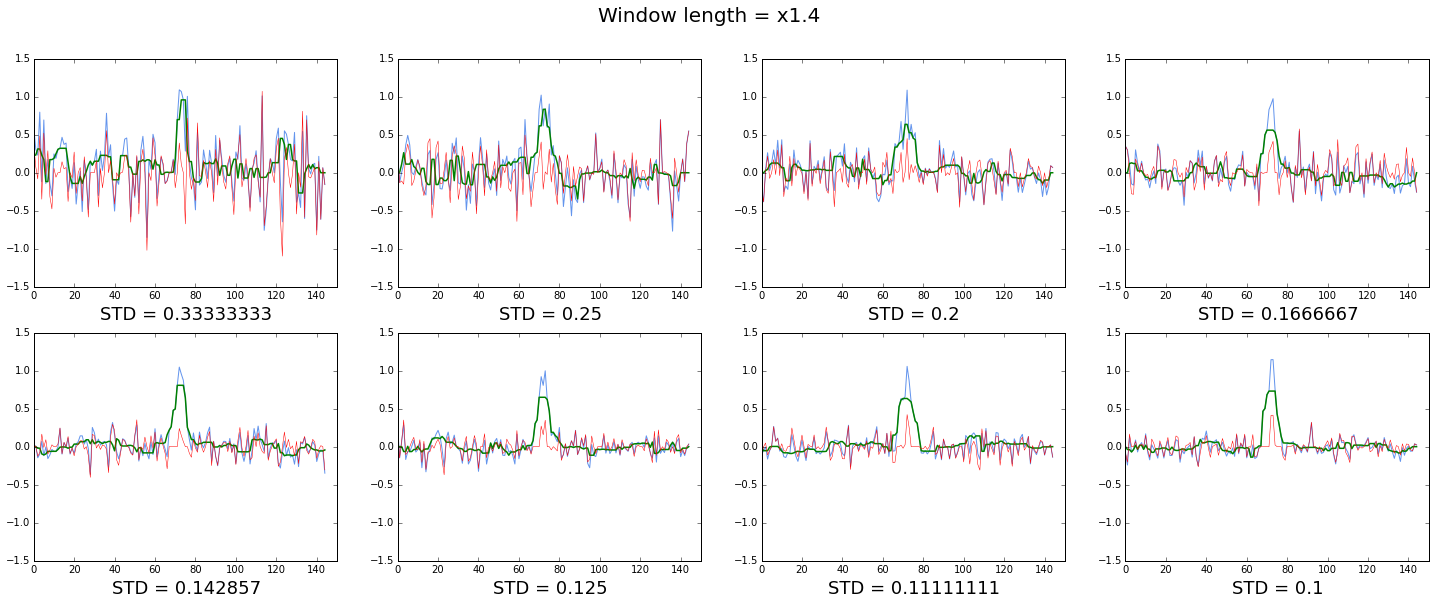

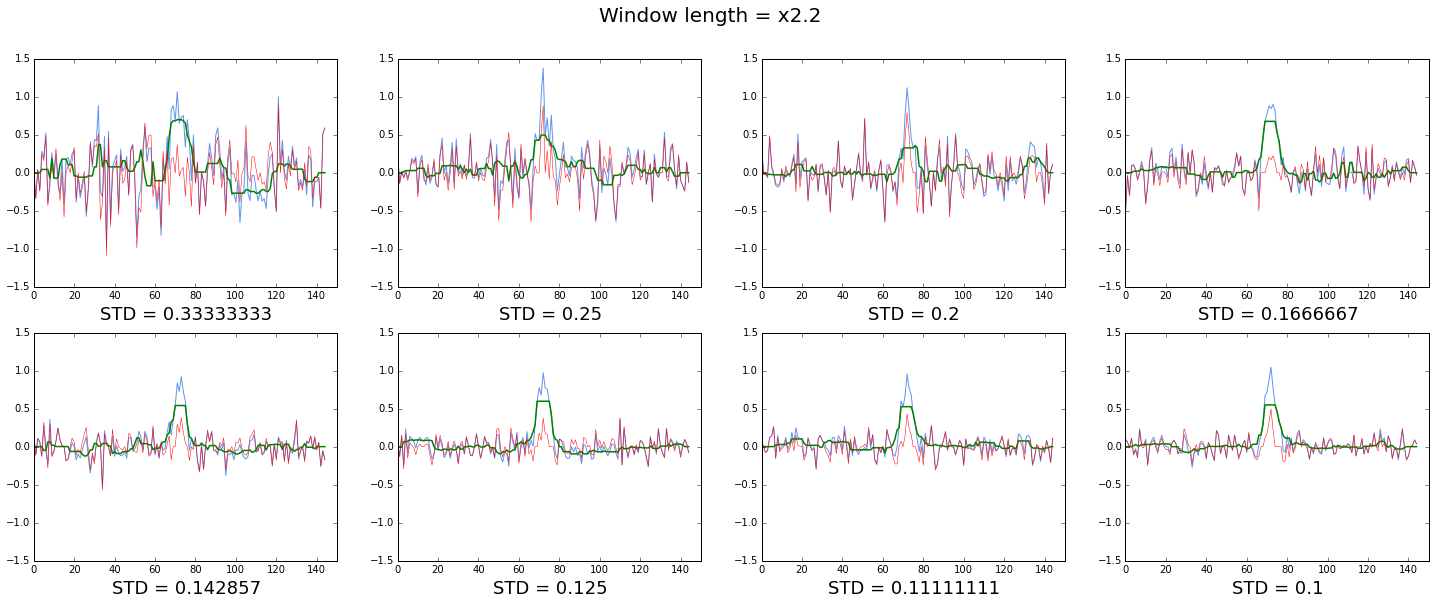

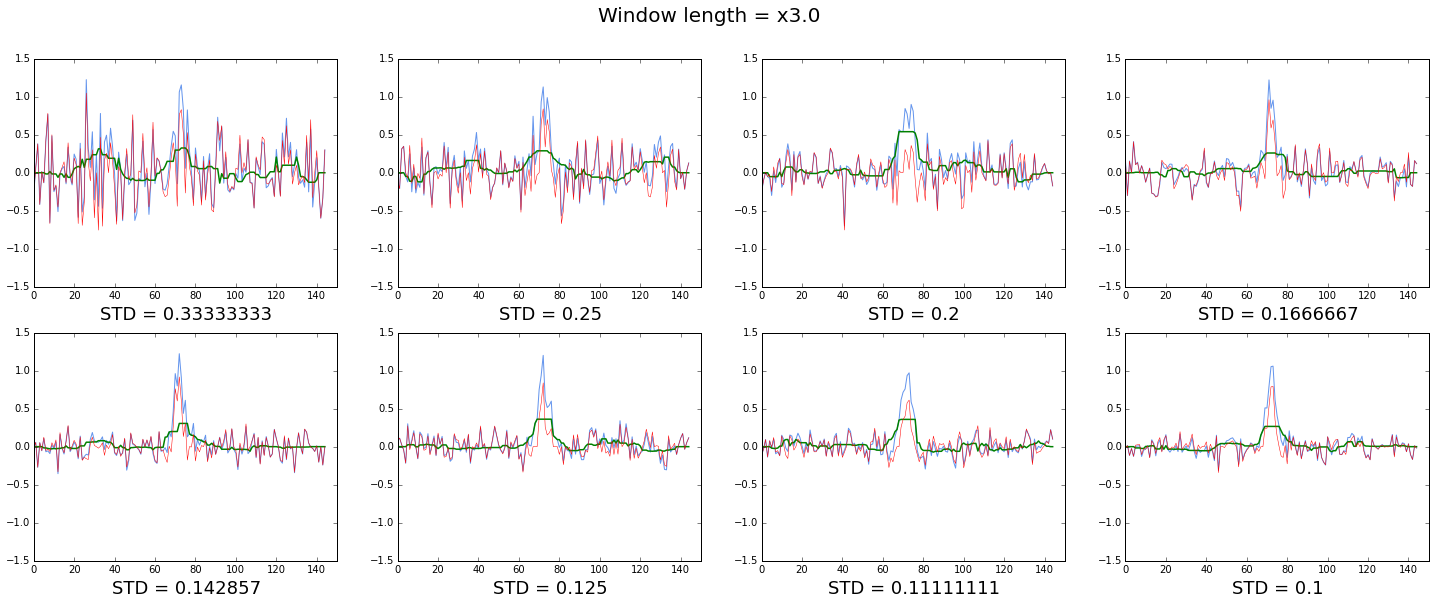

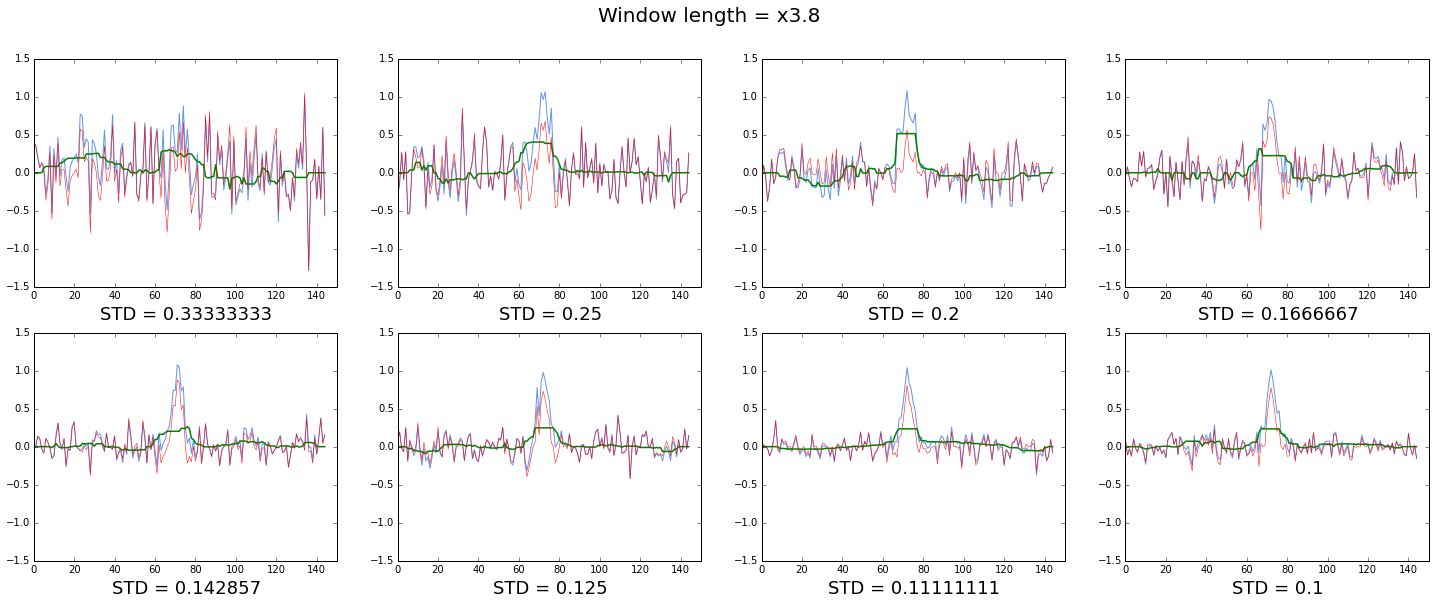

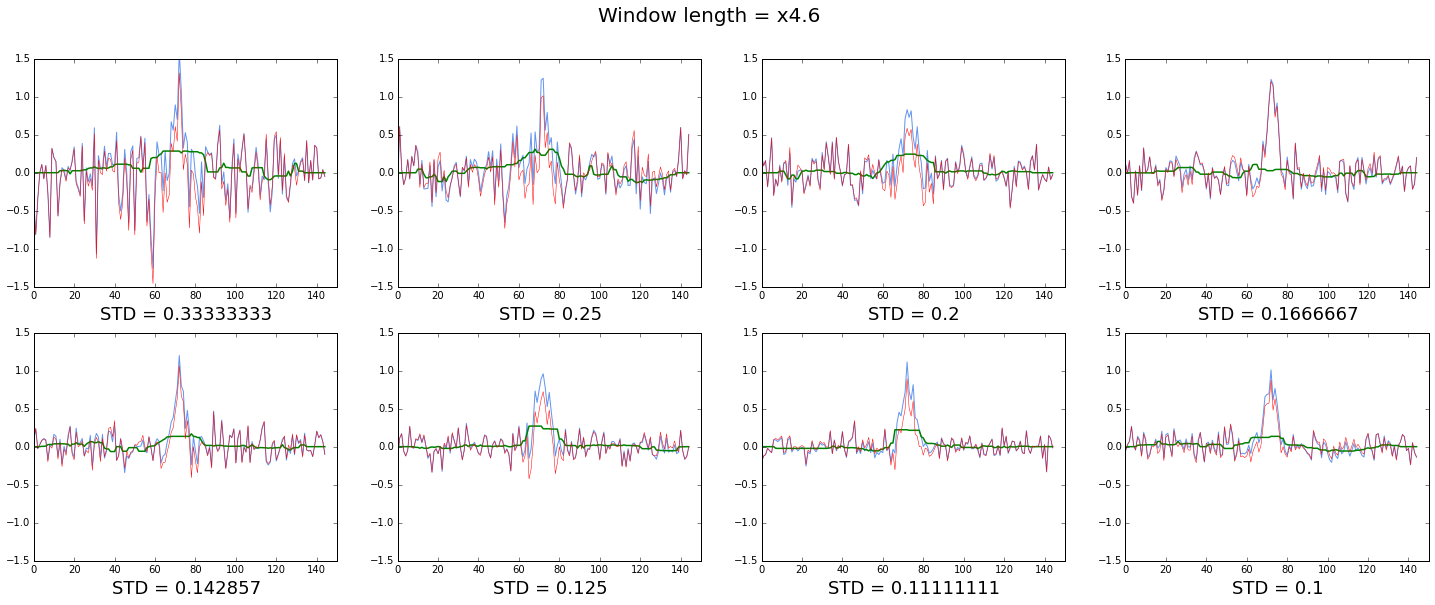

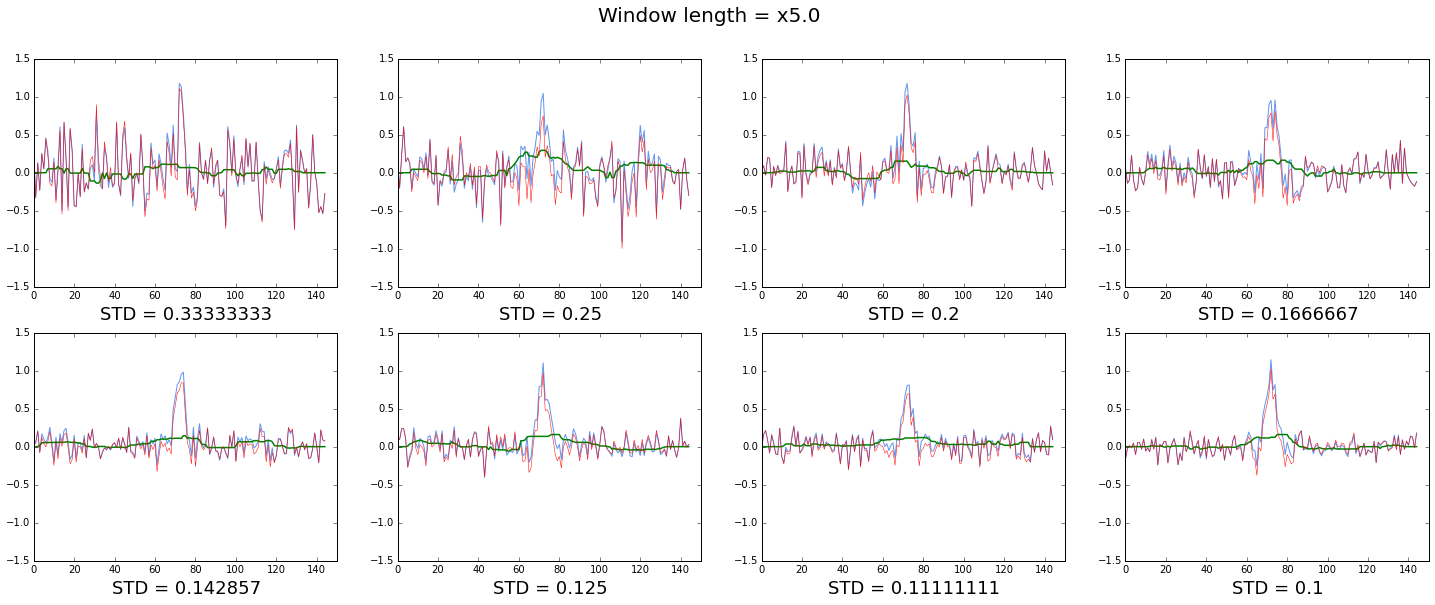

In [11]:
count = 0
count1 = 0
for w in wl:
    count = count + 1
    plt.figure(count, figsize=(25,9))  
    for s in stdsn:
        count1 = count1+1
        plt.subplot(2,4,count1)
        noise = np.random.normal(0, s, len(data))
        signal = data+noise
        filtered = medfilt((data+noise),w)
        plt.suptitle('Window length = x' + str(w/5.), fontsize = 20)
        plt.axis([0,150,-1.5,1.5])
        plt.plot(signal, color = 'cornflowerblue')
        plt.plot(filtered, color ='g', lw = 1.5)
        plt.plot(signal-filtered, color = 'r', lw = 0.5)
        plt.xlabel(("STD = "+str(s)), fontsize=18)
    count1 = 0